# MECH 579 : Numerical Optimization
# Department of Mechanical Engineering, McGill University
# Assignment #4: Constrained Optimization and Model-Order Reduction
Name : Chiyoung Kwon  
ID : 261258263  
Department : Mechanical Engineering  
Program : PhD  

---

## 1. Constrained Rosenbrock Optimization

Minimize the Rosenbrock function defined below using `scipy.optimize`.  
The function is non-convex and has a global minimum at $(1,1)$.  
The minimum lies at the bottom of a narrow parabolic valley that is curved on the $x-y$ plane.  
The problem statement is as follows:

$$
\text{minimize} \quad f(x, y) = (1 - x)^2 + 100 (y - x^2)^2
$$

$$
\text{with respect to} \quad (x, y) \in \mathbb{R}^2
$$

$$
\text{subject to} \quad  \hat{c}(x, y) = 1 - x^2 - y^2 \ge 0.
$$

---

#### (a) Write a Python code to find the minimum of the function subject to the given constraint using the *SLSQP (Sequential Least Squares Programming)* method. Compute the gradient and provide it to the `scipy.optimize` library. Provide the following in a written report:

In [191]:
# ------------------------------------------------------------------ Clear variables ------------------------------------------------------------------
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]
del var, all

In [192]:
# ------------------------------------------------------------------ Import modules ------------------------------------------------------------------
import numpy as np
import torch
import scipy.optimize as sci_opt
import sys
sys.path.append('../')
from module_opt import *
import matplotlib.pyplot as plt

In [193]:
# ------------------------------------------------------------------ Define functions ------------------------------------------------------------------
# obj function
def f(x:np.ndarray) -> np.float64:
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

# gradient of obj function
def grad_f(x:np.ndarray) -> np.float64:
    x = torch.tensor(x, requires_grad=True)
    f(x).backward()
    return x.grad.detach().numpy()    

# constr function
def c(x:np.ndarray) -> np.float64:
    return 1 - x[0]**2 - x[1]**2

# gradient of constr function
def grad_c(x:np.ndarray) -> np.float64:
    x = torch.tensor(x, requires_grad=True)
    c(x).backward()
    return x.grad.detach().numpy()

In [194]:
# ------------------------------------------------------------------ xk Log of SLSQP ------------------------------------------------------------------
x_sqsqp_sci = []
def cb(xk):
    x_sqsqp_sci.append(xk.copy())

In [195]:
x0 = np.array([.1, .1])
x_sqsqp_sci.append(x0)
log_sqsqp_sci = sci_opt.minimize(fun=f, x0=x0, jac=grad_f, method='SLSQP', constraints={'type' : 'ineq', 'fun' : c, 'jac' : grad_c}, tol=1e-6, callback=cb)
log_sqp_mine = sqp(f=f, ce=[], ci=[c], x0=x0, inner_opt=3, tol=1e-6, tol_inter=1e-4)

/home/chiyoung0/NumericalOptimization_25/Assignment_4/../module_opt.py:497: RuntimeWarning: divide by zero encountered in scalar divide
  mu = max(max_lp, ((grad_f_k @ p_k) + .5*sigma*pBp)/((1 - rho)*sum_c)) # penalty parameter for constraint terms in phi1



 log - SQP
‖∆x‖ = 1.47e-01, x01 = [0.14218750, -0.04062500] | f = 1.1060e+00, ‖∇L‖ = 1.23e+01, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 6.93e-02, x02 = [0.20867842, -0.02118043] | f = 1.0451e+00, ‖∇L‖ = 1.35e+01, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 1.25e-01, x03 = [0.25140292, 0.09589510] | f = 6.6727e-01, ‖∇L‖ = 8.10e+00, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 6.49e-02, x04 = [0.31627409, 0.09574917] | f = 4.6931e-01, ‖∇L‖ = 1.19e+00, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 8.87e-02, x05 = [0.39732247, 0.13191077] | f = 4.3058e-01, ‖∇L‖ = 5.96e+00, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 1.77e-02, x06 = [0.40349427, 0.14852747] | f = 3.7621e-01, ‖∇L‖ = 3.06e+00, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆

/home/chiyoung0/NumericalOptimization_25/Assignment_4/../module_opt.py:507: RuntimeWarning: invalid value encountered in scalar multiply
  Dphi1_0 = -p_k @ grad_f_k - mu*sum_c # directional derivative wrt pk at x0
/home/chiyoung0/NumericalOptimization_25/Assignment_4/../module_opt.py:510: RuntimeWarning: invalid value encountered in scalar multiply
  Dphi1_0 = -pBp + (p_k @ A_lmbda) + (p_k @ A_nu) - mu*sum_c
/home/chiyoung0/NumericalOptimization_25/Assignment_4/../module_opt.py:506: RuntimeWarning: invalid value encountered in scalar multiply
  phi1 = lambda alpha : f(x_k + alpha*p_k) + mu*(sum([abs(ce_j(x_k + alpha*p_k)) for ce_j in ce]) + sum([np.maximum(-ci_j(x_k + alpha*p_k), 0) for ci_j in ci])) # l1 merit function


In [196]:
f_sqsqp_sci = []
grad_f_sqsqp_sci = []
c_sqsqp_sci = []

for xk in x_sqsqp_sci:
    f_sqsqp_sci.append(f(xk))
    grad_f_sqsqp_sci.append(np.linalg.norm(grad_f(xk)))
    c_sqsqp_sci.append(c(xk))

In [197]:
x_sqp_mine = log_sqp_mine[0]
f_sqp_mine = log_sqp_mine[1]
grad_f_sqp_mine = [np.linalg.norm(grad_f_k) for grad_f_k in log_sqp_mine[2]]
grad_L_sqp_mine = [np.linalg.norm(grad_L_k) for grad_L_k in log_sqp_mine[3]]
c_sqp_mine = log_sqp_mine[5]

In [198]:
x_sqsqp_sci

[array([0.1, 0.1]),
 array([  5.5, -17.9]),
 array([1.80337776, 0.35516037]),
 array([0.26289431, 0.06300771]),
 array([0.33871204, 0.1079608 ]),
 array([0.60549344, 0.27539841]),
 array([0.56348045, 0.27320071]),
 array([0.54436567, 0.28004934]),
 array([0.60507065, 0.36809743]),
 array([0.83886403, 0.62948966]),
 array([0.82668467, 0.63313419]),
 array([0.77441116, 0.57914971]),
 array([0.7511412 , 0.55703409]),
 array([0.78043125, 0.60620139]),
 array([0.78659318, 0.61760767]),
 array([0.78641991, 0.61769229]),
 array([0.78641991, 0.61769229])]

In [199]:
x_sqp_mine

[array([0.1, 0.1]),
 array([ 0.1421875, -0.040625 ]),
 array([ 0.20867842, -0.02118043]),
 array([0.25140292, 0.0958951 ]),
 array([0.31627409, 0.09574917]),
 array([0.39732247, 0.13191077]),
 array([0.40349427, 0.14852747]),
 array([0.50119294, 0.24155868]),
 array([0.61914778, 0.35887715]),
 array([0.64803621, 0.41850449]),
 array([0.75839124, 0.55918211]),
 array([0.76086967, 0.57419854]),
 array([0.78737843, 0.6186379 ]),
 array([0.78640918, 0.61770719]),
 array([0.78640874, 0.61768831]),
 array([0.78640874, 0.61768831])]

#### (i) Convergence of the gradient (y-axis: log of the gradient, x-axis: iteration) and a comparison of the convergence.

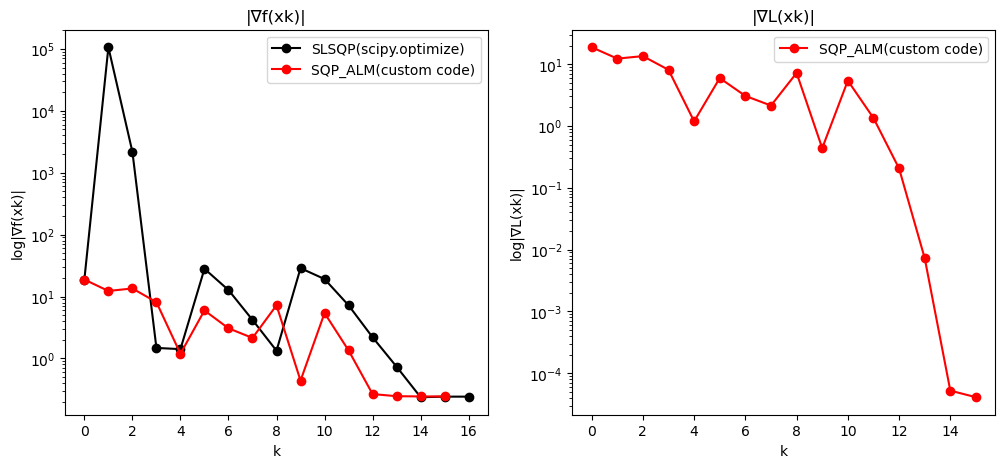

In [200]:
fig, axes = plt.subplots(1, 2, figsize=(6*2, 5))
axes[0].plot(grad_f_sqsqp_sci, 'ko-', label='SLSQP(scipy.optimize)')
axes[0].plot(grad_f_sqp_mine, 'ro-', label='SQP_ALM(custom code)')
axes[0].set_yscale('log')
axes[0].set_title('|∇f(xk)|')
axes[0].set_xlabel('k')
axes[0].set_ylabel('log|∇f(xk)|')
axes[0].legend()

axes[1].plot(grad_L_sqp_mine, 'ro-', label='SQP_ALM(custom code)')
axes[1].set_yscale('log')
axes[1].set_title('|∇L(xk)|')
axes[1].set_xlabel('k')
axes[1].set_ylabel('log|∇L(xk)|')
axes[1].legend()

#### (ii) Contour plot of the path of the optimization algorithm.

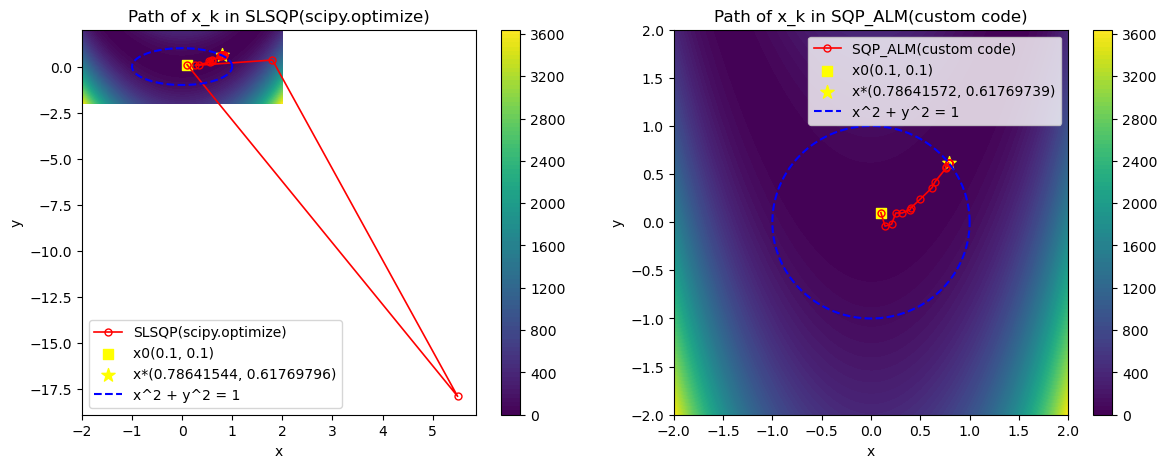

In [201]:
step = .01
grid = np.meshgrid(np.arange(-2, 2+step, step), np.arange(-2, 2+step, step))
f_grid = f(grid)

# === 원 (x^2 + y^2 = 1) parametric ===
theta = np.linspace(0, 2*np.pi, 400)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

fig, axes = plt.subplots(1, 2, figsize=(7*2, 5))

contourf_0 = axes[0].contourf(grid[0], grid[1], f_grid, levels=100)
axes[0].plot([xk[0] for xk in x_sqsqp_sci], [xk[1] for xk in x_sqsqp_sci],
             color='red', marker='o', markersize=5, markerfacecolor='none', markeredgecolor='red', linewidth=1.2, label='SLSQP(scipy.optimize)')
axes[0].scatter(x_sqsqp_sci[0][0], x_sqsqp_sci[0][1], color='yellow', marker='s', s=50, label='x0(0.1, 0.1)')
axes[0].scatter(x_sqsqp_sci[-1][0], x_sqsqp_sci[-1][1], color='yellow', marker='*', s=100, label='x*(0.78641544, 0.61769796)')
axes[0].plot(circle_x, circle_y, 'b--', linewidth=1.5, label='x^2 + y^2 = 1')
axes[0].set_title('Path of x_k in SLSQP(scipy.optimize)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend(loc='best')
fig.colorbar(contourf_0, ax=axes[0])

contourf_1 = axes[1].contourf(grid[0], grid[1], f_grid, levels=100)
axes[1].plot([xk[0] for xk in x_sqp_mine], [xk[1] for xk in x_sqp_mine],
             color='red', marker='o', markersize=5, markerfacecolor='none', markeredgecolor='red', linewidth=1.2, label='SQP_ALM(custom code)')
axes[1].scatter(x_sqp_mine[0][0], x_sqp_mine[0][1], color='yellow', marker='s', s=50, label='x0(0.1, 0.1)')
axes[1].scatter(x_sqp_mine[-1][0], x_sqp_mine[-1][1], color='yellow', marker='*', s=100, label='x*(0.78641572, 0.61769739)')
axes[1].plot(circle_x, circle_y, 'b--', linewidth=1.5, label='x^2 + y^2 = 1')
axes[1].set_title('Path of x_k in SQP_ALM(custom code)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend(loc='best')
fig.colorbar(contourf_1, ax=axes[1])

#### (iii) Discuss and compare the plots, as well as discuss the choice of parameters used in your results and their effect on the optimization.

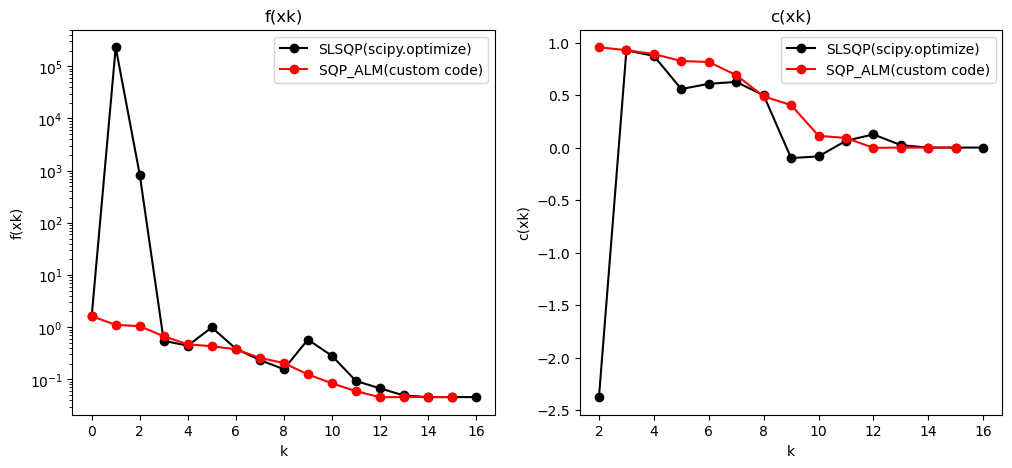

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(6*2, 5))
axes[0].plot(f_sqsqp_sci, 'ko-', label='SLSQP(scipy.optimize)')
axes[0].plot(f_sqp_mine, 'ro-', label='SQP_ALM(custom code)')
axes[0].set_yscale('log')
axes[0].set_title('f(xk)')
axes[0].set_xlabel('k')
axes[0].set_ylabel('f(xk)')
axes[0].legend()

axes[1].plot(np.arange(2, len(c_sqsqp_sci)), c_sqsqp_sci[2:], 'ko-', label='SLSQP(scipy.optimize)')
axes[1].plot(np.arange(2, len(c_sqp_mine)), c_sqp_mine[2:], 'ro-', label='SQP_ALM(custom code)')
# axes[1].set_yscale('log')
axes[1].set_title('c(xk)')
axes[1].set_xlabel('k')
axes[1].set_ylabel('c(xk)')
axes[1].legend()

I solved the given optimization problem using two methods: **SciPy’s `optimize` SLSQP algorithm** and **my own SQP implementation**, in which the **intermediate solver for the QP subproblem is an Augmented Lagrangian Method (ALM)**. I then compared the results obtained from the two approaches. Since SciPy’s SLSQP provides only the final solution and the log of the iterate sequence \{$x_k$\}, and does **not** expose the Lagrange multipliers or any related internal quantities, it was not possible to compute the Lagrangian gradient for SLSQP. Therefore, the plot of the Lagrangian gradient $\lVert \nabla L(x_k, \lambda_k) \rVert$ is presented **only for my SQP implementation**.

I am not fully aware of the exact internal mechanics of SciPy’s SLSQP. However, from the observed behavior at $k = 1$ —where SLSQP exhibits a substantial overshoot compared to my SQP method—it seems likely that SLSQP performs a rather aggressive BFGS Hessian update during the early iterations. In contrast, my SQP implementation constructs the Hessian of the Lagrangian for the QP subproblem in a more conservative way. Moreover, I applied a **hot-start strategy**, where the step $p_k^*$ obtained from the ALM at iteration $k$ is used as the initial guess $p^0$ for solving the QP subproblem at iteration k+1. As a result, my SQP algorithm tends to exhibit a more stable and smooth optimization path.


## 2. Constrained Brequet Range equation

Take the problem of the Brequet Range equation from Assignment 2. According to the
aircraft manufacturer, the maximum altitude that the aircraft can fly at is 2 · 104 m.
Furthermore, in the area of interest the maximum speed the aircraft can fly at is
540 km/hr.

#### (a) Solve the same optimization problem as in Assignment 3 with the maximum constraints given above and appropriate minimum constraints using the `scipy.optimize`. Compute the gradient and provide it to the `scipy.optimize` library.

In [203]:
sys.path.append('../Assignment_3')
import breguet_range_equation_fromprofessor
import importlib
importlib.reload(breguet_range_equation_fromprofessor)
from breguet_range_equation_fromprofessor import *

In [204]:
# obj function for scipy(numpy type)
def f2(x):
    x_t = torch.as_tensor(x)
    return -breguet_range(x_t[0], x_t[1], 162400.0, 100.0).numpy().astype(np.float64) # negative sign for maximum range

# obj function for AD using torch(torch type)
def f2_for_AD_troch(x):
    return -breguet_range(x[0], x[1], 162400.0, 100.0) # negative sign for maximum range

# gradient of obj function
def grad_f2(x:np.ndarray) -> np.float64:
    x = torch.tensor(x, requires_grad=True)
    f2_for_AD_troch(x).backward() # torch type
    return x.grad.detach().numpy().astype(np.float64)

def c1(x): # v >= 1 [m/s]
    return x[0] - 1

def grad_c1(x):
    x = torch.tensor(x, requires_grad=True)
    c1(x).backward()
    return x.grad.detach().numpy()

def c2(x): # v <= 540*1000/3600 [m/s]
    return -x[0] + 540*1000/3600

def grad_c2(x):
    x = torch.tensor(x, requires_grad=True)
    c2(x).backward()
    return x.grad.detach().numpy()

def c3(x): # v >= 1 [m]
    return x[1] - 1

def grad_c3(x): 
    x = torch.tensor(x, requires_grad=True)
    c3(x).backward()
    return x.grad.detach().numpy()

def c4(x): # v <= 20000 [m]
    return -x[1] + 2*1e4

def grad_c4(x):
    x = torch.tensor(x, requires_grad=True)
    c4(x).backward()
    return x.grad.detach().numpy()

In [205]:
# ------------------------------------------------------------------ xk Log of SLSQP ------------------------------------------------------------------
x_sqsqp_sci2 = []
def cb2(xk):
    x_sqsqp_sci2.append(xk.copy())

In [206]:
x0_2 = np.array([50.0, 10000.0])
x_sqsqp_sci2.append(x0_2)

constraints2 = [
    {'type': 'ineq', 'fun': c1, 'jac': grad_c1},
    {'type': 'ineq', 'fun': c2, 'jac': grad_c2},
    {'type': 'ineq', 'fun': c3, 'jac': grad_c3},
    {'type': 'ineq', 'fun': c4, 'jac': grad_c4},
]

log_sqsqp_sci2 = sci_opt.minimize(fun=f2, x0=x0_2, jac=grad_f2, method='SLSQP', constraints=constraints2, tol=1e-6, callback=cb2)
log_sqp_mine2 = sqp(f=f2, ce=[], ci=[c1, c2, c3, c4], x0=x0_2, inner_opt=3, tol=1e-6, tol_inter=1e-4)


 log - SQP
‖∆x‖ = 9.84e+01, x01 = [148.38012554, 9999.77148155] | f = -1.0380e+04, ‖∇L‖ = 1.65e+01, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 7.05e+00, x02 = [141.33773233, 10000.17996551] | f = -1.0439e+04, ‖∇L‖ = 8.55e-01, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 8.60e-01, x03 = [141.30096925, 10001.03876003] | f = -1.0440e+04, ‖∇L‖ = 8.55e-01, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 4.39e+00, x04 = [141.33206054, 10005.42462359] | f = -1.0444e+04, ‖∇L‖ = 8.55e-01, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 2.19e+01, x05 = [141.47637087, 10027.35729717] | f = -1.0462e+04, ‖∇L‖ = 8.55e-01, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 1.10e+02, x06 = [142.19919310, 10137.08691684] | f = -1.0556e+04, ‖∇L‖ = 8.58e-01, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.

In [228]:
f_sqsqp_sci2 = []
grad_f_sqsqp_sci2 = []
c1_sqsqp_sci2 = []
c2_sqsqp_sci2 = []
c3_sqsqp_sci2 = []
c4_sqsqp_sci2 = []

for xk in x_sqsqp_sci2:
    f_sqsqp_sci2.append(-f2(xk))
    grad_f_sqsqp_sci2.append(np.linalg.norm(grad_f2(xk)))
    c1_sqsqp_sci2.append(c1(xk))
    c2_sqsqp_sci2.append(c2(xk))
    c3_sqsqp_sci2.append(c3(xk))
    c4_sqsqp_sci2.append(c4(xk))

In [234]:
x_sqp_mine2 = log_sqp_mine2[0]
f_sqp_mine2 = [-f_k for f_k in log_sqp_mine2[1]]
grad_f_sqp_mine2 = [np.linalg.norm(grad_f2_k) for grad_f2_k in log_sqp_mine2[2]]
grad_L_sqp_mine2 = [np.linalg.norm(grad_L_k) for grad_L_k in log_sqp_mine[3]]
c1_sqp_mine2 = [c_k[0] for c_k in log_sqp_mine2[5]]
c2_sqp_mine2 = [c_k[1] for c_k in log_sqp_mine2[5]]
c3_sqp_mine2 = [c_k[2] for c_k in log_sqp_mine2[5]]
c4_sqp_mine2 = [c_k[3] for c_k in log_sqp_mine2[5]]

In [214]:
resolution = .1
step_V = 50*resolution
step_h = 5000*resolution
V_limit = 200 # [m/s]
h_limit = 20000 # [m]
grid = np.meshgrid(np.arange(0.01, V_limit+step_V, step_V), np.arange(0.01, h_limit+step_h, step_h))
Range = -f2(grid)

#### (i) Convergence gradient of the Lagrangian (y-axis: log of the gradient, x-axis: iteration) and a comparison of the convergence.  
Scipy does not provide its history of gradient of Lagrangian function.  
Therefore I plotted only the history of gradient of Lagrangian function within the solution using my own SQP code.

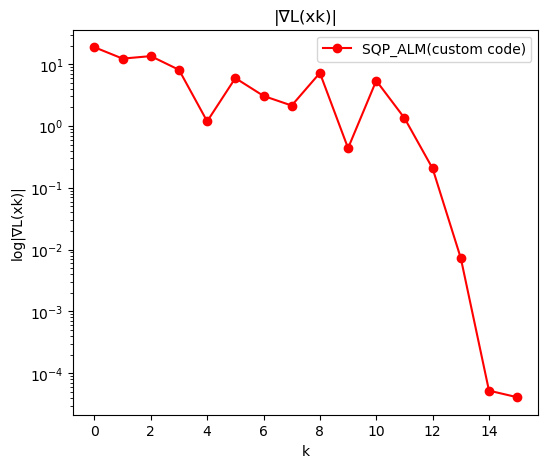

In [218]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
axes.plot(grad_L_sqp_mine2, 'ro-', label='SQP_ALM(custom code)')
axes.set_yscale('log')
axes.set_title('|∇L(xk)|')
axes.set_xlabel('k')
axes.set_ylabel('log|∇L(xk)|')
axes.legend()

#### (ii) Convergence of the range and constraints as a function of design iterations.

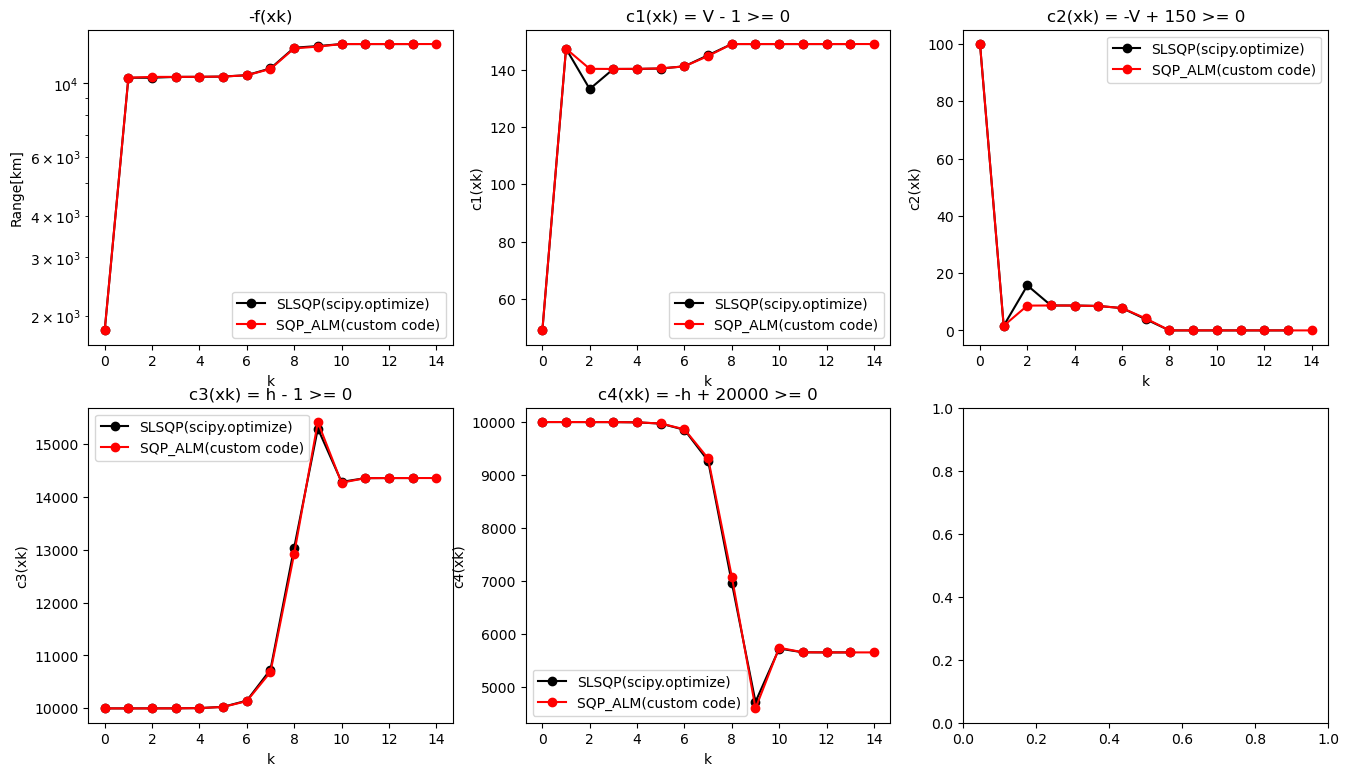

In [242]:
fig, axes = plt.subplots(2, 3, figsize=(8*2, 3*3))
axes[0, 0].plot(f_sqsqp_sci2, 'ko-', label='SLSQP(scipy.optimize)')
axes[0, 0].plot(f_sqp_mine2, 'ro-', label='SQP_ALM(custom code)')
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('-f(xk)')
axes[0, 0].set_xlabel('k')
axes[0, 0].set_ylabel('Range[km]')
axes[0, 0].legend()

axes[0, 1].plot(c1_sqsqp_sci2, 'ko-', label='SLSQP(scipy.optimize)')
axes[0, 1].plot(c1_sqp_mine2, 'ro-', label='SQP_ALM(custom code)')
axes[0, 1].set_title('c1(xk) = V - 1 >= 0')
axes[0, 1].set_xlabel('k')
axes[0, 1].set_ylabel('c1(xk)')
axes[0, 1].legend()

axes[0, 2].plot(c2_sqsqp_sci2, 'ko-', label='SLSQP(scipy.optimize)')
axes[0, 2].plot(c2_sqp_mine2, 'ro-', label='SQP_ALM(custom code)')
axes[0, 2].set_title('c2(xk) = -V + 150 >= 0')
axes[0, 2].set_xlabel('k')
axes[0, 2].set_ylabel('c2(xk)')
axes[0, 2].legend()

axes[1, 0].plot(c3_sqsqp_sci2, 'ko-', label='SLSQP(scipy.optimize)')
axes[1, 0].plot(c3_sqp_mine2, 'ro-', label='SQP_ALM(custom code)')
axes[1, 0].set_title('c3(xk) = h - 1 >= 0')
axes[1, 0].set_xlabel('k')
axes[1, 0].set_ylabel('c3(xk)')
axes[1, 0].legend()

axes[1, 1].plot(c4_sqsqp_sci2, 'ko-', label='SLSQP(scipy.optimize)')
axes[1, 1].plot(c4_sqp_mine2, 'ro-', label='SQP_ALM(custom code)')
axes[1, 1].set_title('c4(xk) = -h + 20000 >= 0')
axes[1, 1].set_xlabel('k')
axes[1, 1].set_ylabel('c4(xk)')
axes[1, 1].legend()

#### (iii) Contour plot of the path of the optimization algorithm.

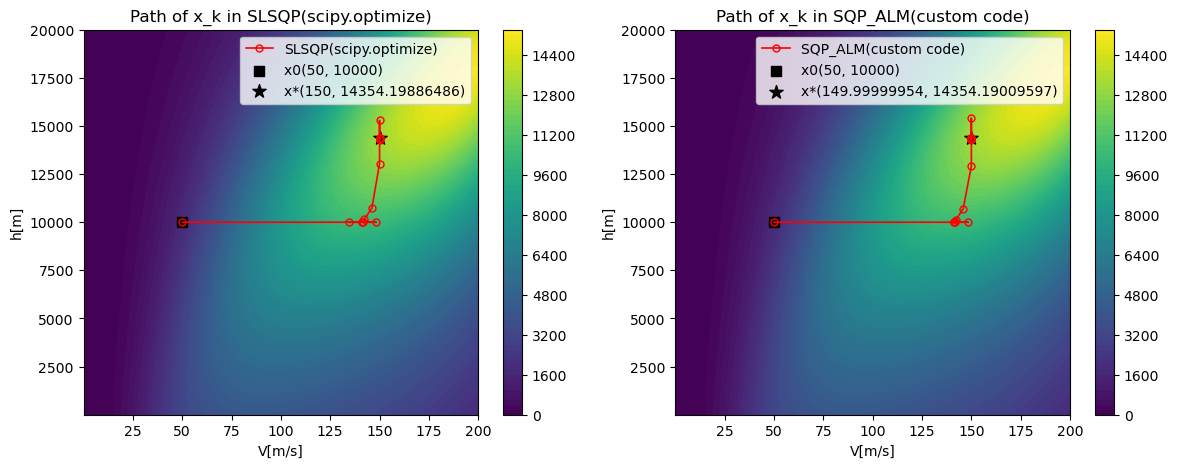

In [215]:
fig2, axes2 = plt.subplots(1, 2, figsize=(7*2, 5))

contourf2_0 = axes2[0].contourf(grid[0], grid[1], Range, levels=100)
axes2[0].plot([xk[0] for xk in x_sqsqp_sci2], [xk[1] for xk in x_sqsqp_sci2],
             color='red', marker='o', markersize=5, markerfacecolor='none', markeredgecolor='red', linewidth=1.2, label='SLSQP(scipy.optimize)')
axes2[0].scatter(x_sqsqp_sci2[0][0], x_sqsqp_sci2[0][1], color='black', marker='s', s=50, label='x0(50, 10000)')
axes2[0].scatter(x_sqsqp_sci2[-1][0], x_sqsqp_sci2[-1][1], color='black', marker='*', s=100, label='x*(150, 14354.19886486)')
axes2[0].set_title('Path of x_k in SLSQP(scipy.optimize)')
axes2[0].set_xlabel('V[m/s]')
axes2[0].set_ylabel('h[m]')
axes2[0].legend(loc='best')
fig2.colorbar(contourf2_0, ax=axes2[0])

contourf2_1 = axes2[1].contourf(grid[0], grid[1], Range, levels=100)
axes2[1].plot([xk[0] for xk in x_sqp_mine2], [xk[1] for xk in x_sqp_mine2],
             color='red', marker='o', markersize=5, markerfacecolor='none', markeredgecolor='red', linewidth=1.2, label='SQP_ALM(custom code)')
axes2[1].scatter(x_sqp_mine2[0][0], x_sqp_mine2[0][1], color='black', marker='s', s=50, label='x0(50, 10000)')
axes2[1].scatter(x_sqp_mine2[-1][0], x_sqp_mine2[-1][1], color='black', marker='*', s=100, label='x*(149.99999954, 14354.19009597)')
axes2[1].set_title('Path of x_k in SQP_ALM(custom code)')
axes2[1].set_xlabel('V[m/s]')
axes2[1].set_ylabel('h[m]')
axes2[1].legend(loc='best')
fig2.colorbar(contourf2_1, ax=axes2[1])